1/1 [==============================] - 6s 6s/step


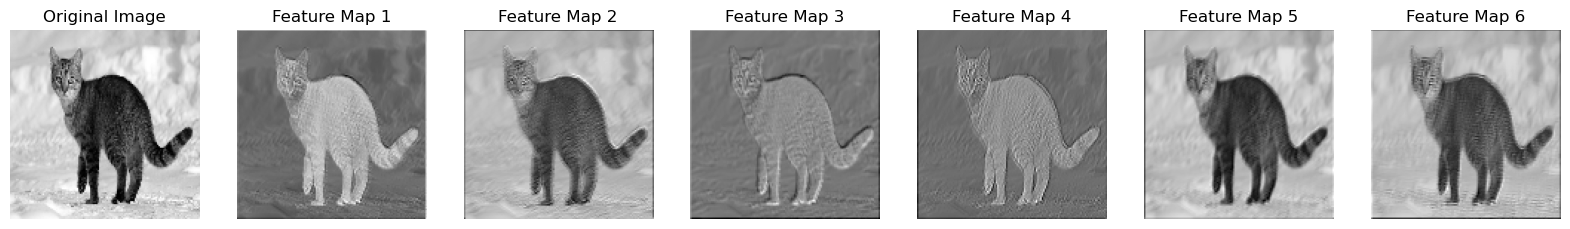

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input
import cv2

# Load an example image (grayscale) for visualization
img_path = tf.keras.utils.get_file("cat.jpg", "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Felis_catus-cat_on_snow.jpg/512px-Felis_catus-cat_on_snow.jpg")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
img = cv2.resize(img, (128, 128))  # Resize for simplicity
img = img.astype(np.float32) / 255.0  # Normalize pixel values
img = np.expand_dims(img, axis=[0, -1])  # Reshape to (1, 128, 128, 1) for CNN input

# Define a simple CNN model with 6 filters
input_layer = Input(shape=(128, 128, 1))
conv_layer = Conv2D(filters=6, kernel_size=(3, 3), padding='same', activation=None)(input_layer)
model = Model(inputs=input_layer, outputs=conv_layer)

# Get the feature maps (output of the convolutional layer)
feature_maps = model.predict(img)

# Plot the original image and the resulting feature maps
fig, axes = plt.subplots(1, 7, figsize=(20, 5))

# Show the original image
axes[0].imshow(img[0, :, :, 0], cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show each filter's feature map
for i in range(6):
    axes[i + 1].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i + 1].set_title(f"Feature Map {i+1}")
    axes[i + 1].axis("off")

# Display the feature maps
plt.show()

1/1 [==============================] - 0s 187ms/step


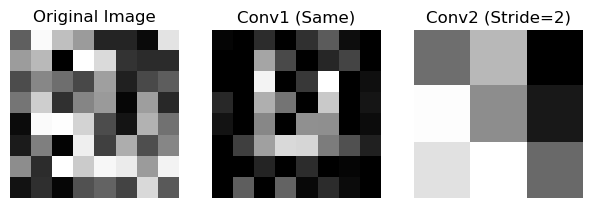

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Generate a random grayscale image (8x8)
np.random.seed(42)
image = np.random.rand(8, 8).astype(np.float32)

# Reshape for CNN input (batch_size, height, width, channels)
image_input = np.expand_dims(image, axis=[0, -1])  # Shape: (1, 8, 8, 1)

# Define CNN model with multiple layers
input_layer = Input(shape=(8, 8, 1))

# Layer 1: Standard Convolution (Padding = 'same')
conv1 = Conv2D(filters=4, kernel_size=(3, 3), padding='same', activation='relu')(input_layer)

# Layer 2: Strided Convolution (Stride = 2, Padding = 'valid', Downsampling)
conv2 = Conv2D(filters=4, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu')(conv1)

# Flatten and Fully Connected Layer
flattened = Flatten()(conv2)
dense_layer = Dense(10, activation='softmax')(flattened)

# Create model
model = Model(inputs=input_layer, outputs=dense_layer)

# Get intermediate outputs to visualize feature maps
intermediate_layer_model = Model(inputs=model.input, outputs=[conv1, conv2])
conv1_out, conv2_out = intermediate_layer_model.predict(image_input)

# Show Original Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Show Feature Maps for each Layer
for i, (feature_map, title) in enumerate(zip([conv1_out, conv2_out], ["Conv1 (Same)", "Conv2 (Stride=2)"])):
    plt.subplot(1, 4, i + 2)
    plt.imshow(feature_map[0, :, :, 0], cmap='gray')
    plt.title(title)
    plt.axis("off")

plt.show()

1/1 [==============================] - 0s 63ms/step


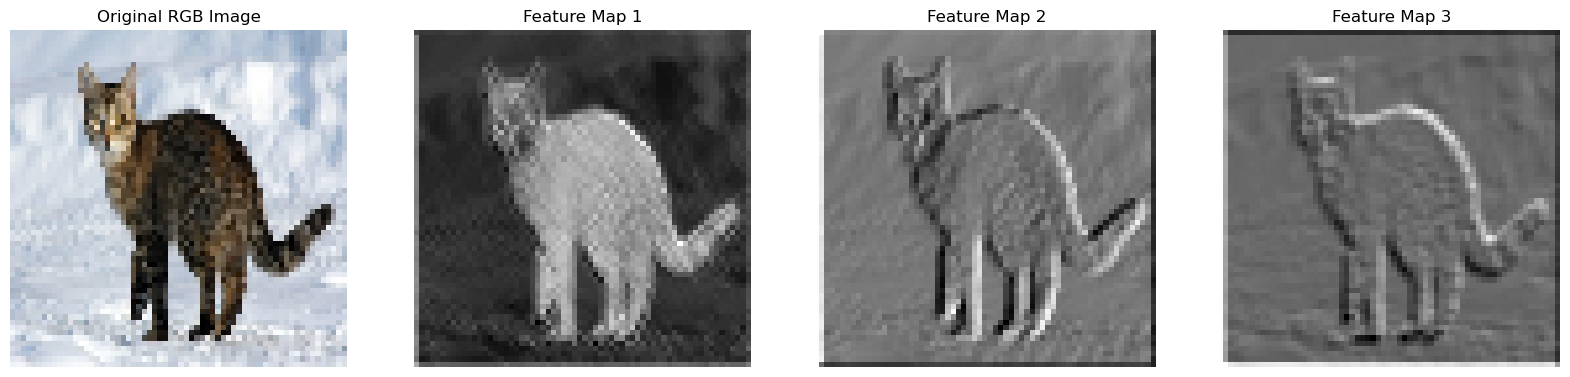

In [3]:
img = cv2.imread(img_path)  # Load in color (RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
img = cv2.resize(img, (64, 64))  # Resize for simplicity
img = img.astype(np.float32) / 255.0  # Normalize pixel values
img = np.expand_dims(img, axis=0)  # Reshape to (1, 64, 64, 3) for CNN input

# Define a CNN model with multiple 3D convolutional filters
input_layer = Input(shape=(64, 64, 3))

# Apply 3D convolutions (filters spanning all RGB channels)
conv_layer = Conv2D(filters=3, kernel_size=(3, 3), padding='same', activation='linear')(input_layer)

# Create model
model = Model(inputs=input_layer, outputs=conv_layer)

# Get the feature maps (output of the convolutional layer)
feature_maps = model.predict(img)

# Plot the original image and the resulting feature maps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Show the original image
axes[0].imshow(img[0])  # Display RGB image
axes[0].set_title("Original RGB Image")
axes[0].axis("off")

# Show each filter's feature map
for i in range(3):  # Since we used 3 filters
    axes[i + 1].imshow(feature_maps[0, :, :, i], cmap='gray')  # Feature maps are grayscale
    axes[i + 1].set_title(f"Feature Map {i+1}")
    axes[i + 1].axis("off")

# Display the feature maps
plt.show()

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

### 📌 PART 1: CNN for Text Classification (1D Convolution) ###

# Simulate a dataset: 1000 sentences (encoded as sequences of 20 words from vocab of 5000)
num_samples = 1000
sequence_length = 20  # Each sentence has 20 words
vocab_size = 5000  # Vocabulary size

# Generate random sequences (pretend each number is a word ID)
X_text = np.random.randint(1, vocab_size, (num_samples, sequence_length))
y_text = np.random.randint(0, 2, num_samples)  # Binary classification

# Split dataset
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y_text, test_size=0.2, random_state=42)

# Define CNN model for text classification (using word embeddings)
text_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=50, input_length=sequence_length),  # Word embeddings
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),  # 1D CNN
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile and train model
text_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
text_model.fit(X_train_text, y_train_text, epochs=5, batch_size=16, verbose=1, validation_data=(X_test_text, y_test_text))

### 📌 PART 2: CNN for Tabular Data ###

# Generate synthetic tabular dataset (structured data, 1000 samples, 10 features)
X_tabular, y_tabular = make_classification(n_samples=1000, n_features=10, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_tabular = scaler.fit_transform(X_tabular)

# Reshape data to fit into 1D CNN input format (samples, timesteps, features)
X_tabular = X_tabular.reshape(X_tabular.shape[0], X_tabular.shape[1], 1)

# Split dataset
X_train_tab, X_test_tab, y_train_tab, y_test_tab = train_test_split(X_tabular, y_tabular, test_size=0.2, random_state=42)

# Define CNN model for tabular data (1D convolution treating features as a sequence)
tabular_model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(10, 1)),  # 1D CNN
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile and train model
tabular_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tabular_model.fit(X_train_tab, y_train_tab, epochs=5, batch_size=16, verbose=1, validation_data=(X_test_tab, y_test_tab))

### 📌 Summary ###
print("\n🚀 CNNs applied to text and tabular data successfully trained!")

Epoch 1/5
50/50 [==============================] - 1s 11ms/step - loss: 0.6937 - accuracy: 0.5063 - val_loss: 0.6949 - val_accuracy: 0.4600
Epoch 2/5
50/50 [==============================] - 0s 5ms/step - loss: 0.5964 - accuracy: 0.9625 - val_loss: 0.7066 - val_accuracy: 0.4700
Epoch 3/5
50/50 [==============================] - 0s 5ms/step - loss: 0.1819 - accuracy: 0.9975 - val_loss: 0.8239 - val_accuracy: 0.4000
Epoch 4/5
50/50 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.8664 - val_accuracy: 0.4200
Epoch 5/5
50/50 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.8841 - val_accuracy: 0.4100
Epoch 1/5
50/50 [==============================] - 1s 6ms/step - loss: 0.5525 - accuracy: 0.7950 - val_loss: 0.4743 - val_accuracy: 0.8400
Epoch 2/5
50/50 [==============================] - 0s 4ms/step - loss: 0.3942 - accuracy: 0.8687 - val_loss: 0.3889 - val_accuracy: 0.8350
Epoch 3/5
50/50 [=========

In [7]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.metrics import accuracy_score

### 📌 PART 1: CNN for Tabular Data ###

# Generate synthetic tabular dataset (structured data, 1000 samples, 10 features)
X_tabular, y_tabular = make_classification(n_samples=1000, n_features=10, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_tabular = scaler.fit_transform(X_tabular)

# Reshape for CNN (samples, timesteps, features)
X_tabular_cnn = X_tabular.reshape(X_tabular.shape[0], X_tabular.shape[1], 1)

# Split dataset
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_tabular_cnn, y_tabular, test_size=0.2, random_state=42)

# Define CNN model for tabular data
cnn_model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(10, 1)),  # 1D CNN
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile and train model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=16, verbose=1, validation_data=(X_test_cnn, y_test_cnn))

# Evaluate CNN
cnn_preds = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)
cnn_accuracy = accuracy_score(y_test_cnn, cnn_preds)
print(f"\n🚀 CNN Accuracy on Tabular Data: {cnn_accuracy:.4f}")

### 📌 PART 2: XGBoost for Tabular Data ###

# Split dataset for XGBoost (no need for reshaping)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_tabular, y_tabular, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predict and evaluate XGBoost
xgb_preds = xgb_model.predict(X_test_xgb)
xgb_accuracy = accuracy_score(y_test_xgb, xgb_preds)
print(f"🚀 XGBoost Accuracy on Tabular Data: {xgb_accuracy:.4f}")

### 📌 Summary ###
print("\n🔹 CNN vs. XGBoost on Tabular Data")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Display which model performed better
if cnn_accuracy > xgb_accuracy:
    print("\n✅ CNN performed better on tabular data!")
else:
    print("\n✅ XGBoost outperformed CNN on tabular data!")

Epoch 1/5
50/50 [==============================] - 1s 6ms/step - loss: 0.5529 - accuracy: 0.7575 - val_loss: 0.4536 - val_accuracy: 0.8150
Epoch 2/5
50/50 [==============================] - 0s 4ms/step - loss: 0.3773 - accuracy: 0.8562 - val_loss: 0.3878 - val_accuracy: 0.8350
Epoch 3/5
50/50 [==============================] - 0s 4ms/step - loss: 0.3303 - accuracy: 0.8737 - val_loss: 0.3856 - val_accuracy: 0.8400
Epoch 4/5
50/50 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8775 - val_loss: 0.3824 - val_accuracy: 0.8400
Epoch 5/5
7/7 [==============================] - 0s 3ms/step

🚀 CNN Accuracy on Tabular Data: 0.8450
🚀 XGBoost Accuracy on Tabular Data: 0.8950

🔹 CNN vs. XGBoost on Tabular Data
CNN Accuracy: 0.8450
XGBoost Accuracy: 0.8950

✅ XGBoost outperformed CNN on tabular data!


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, InputLayer

# Define the CNN model
model = Sequential([
    InputLayer(input_shape=(39, 39, 3)),  # Input image
    Conv2D(filters=10, kernel_size=3, strides=1, activation='relu'),  # Conv Layer 1
    Conv2D(filters=20, kernel_size=5, strides=2, activation='relu'),  # Conv Layer 2
    Conv2D(filters=40, kernel_size=5, strides=2, activation='relu'),  # Conv Layer 3
    Flatten(),  # Flatten output (7x7x40 → 1960)
    Dense(1, activation='sigmoid')  # Binary classification (cat vs. no cat)
], name='Simple Conv Network')

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "Simple Conv Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 37, 37, 10)        280       
                                                                 
 conv2d_8 (Conv2D)           (None, 17, 17, 20)        5020      
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 40)          20040     
                                                                 
 flatten_9 (Flatten)         (None, 1960)              0         
                                                                 
 dense_20 (Dense)            (None, 1)                 1961      
                                                                 
Total params: 27,301
Trainable params: 27,301
Non-trainable params: 0
_________________________________________________________________


170498071/170498071 [==============================] - 377s 2us/step
Training LeNet-5...
Epoch 1/10
782/782 [==============================] - 15s 6ms/step - loss: 1.6366 - accuracy: 0.4078 - val_loss: 1.4426 - val_accuracy: 0.4853
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3487 - accuracy: 0.5203 - val_loss: 1.3501 - val_accuracy: 0.5249
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.2207 - accuracy: 0.5666 - val_loss: 1.2127 - val_accuracy: 0.5711
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1409 - accuracy: 0.5969 - val_loss: 1.1798 - val_accuracy: 0.5802
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.0693 - accuracy: 0.6242 - val_loss: 1.1191 - val_accuracy: 0.6066
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.0130 - accuracy: 0.6447 - val_loss: 1.1076 - val_accuracy: 0.6107
Epoch 7/10
782/782 [==============================] - 3s 4

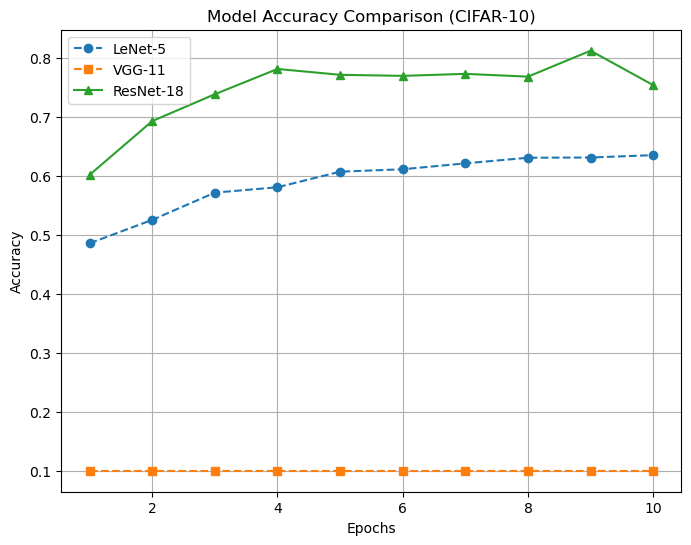

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images

# Function to build LeNet-5
def build_lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5,5), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(16, (5,5), activation='relu', padding='valid'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
    ])
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Function to build VGG-11
def build_vgg11():
    model = models.Sequential([
        layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Function to build ResNet-18
def resnet_block(x, filters, kernel_size=3, downsample=False):
    shortcut = x
    if downsample:
        x = layers.Conv2D(filters, kernel_size=1, strides=2, padding="same")(x)
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=2, padding="same")(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        x = layers.Conv2D(filters, kernel_size, padding="same")(x)

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(filters, kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet18():
    inputs = layers.Input(shape=(32,32,3))

    x = layers.Conv2D(64, 3, strides=1, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, downsample=True)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, downsample=True)
    x = resnet_block(x, 256)

    x = resnet_block(x, 512, downsample=True)
    x = resnet_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Instantiate models
lenet_model = build_lenet()
vgg11_model = build_vgg11()
resnet18_model = build_resnet18()

# Train models and collect history
def train_model(model, name, epochs=10, batch_size=64):
    print(f"Training {name}...")
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test), verbose=1)
    return history

history_lenet = train_model(lenet_model, "LeNet-5")
history_vgg11 = train_model(vgg11_model, "VGG-11")
history_resnet18 = train_model(resnet18_model, "ResNet-18")

# Extract accuracy values
epochs = np.arange(1, 11)
lenet_acc = history_lenet.history["val_accuracy"]
vgg11_acc = history_vgg11.history["val_accuracy"]
resnet18_acc = history_resnet18.history["val_accuracy"]

# Plot Accuracy Comparison
plt.figure(figsize=(8,6))
plt.plot(epochs, lenet_acc, label="LeNet-5", linestyle="dashed", marker="o")
plt.plot(epochs, vgg11_acc, label="VGG-11", linestyle="dashed", marker="s")
plt.plot(epochs, resnet18_acc, label="ResNet-18", linestyle="solid", marker="^")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (CIFAR-10)")
plt.legend()
plt.grid(True)
plt.show()